### Exercise 1e)

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from methods.training_methods import GradientDescent, StochasticGradientDescent
from methods.step_methods import ConstantLearningRateStep, MomentumStep, ADAgradStep, RMSpropStep, AdamStep
from methods.regression_methods import OLS_Gradient, Ridge_Gradient, Lasso_Gradient
from sklearn.preprocessing import PolynomialFeatures
from utils import generate_dataset

In [2]:
# Generating dataset
np.random.seed(124)  
x, y = generate_dataset()

In [3]:
p = 6
X = PolynomialFeatures(p,include_bias = False).fit_transform(x.reshape(-1, 1))
num_features = X.shape[1]

#np.random.seed(1234)
theta = np.random.uniform(-1, 1, X.shape[1])
iterations = 20000

In [4]:
iterations = 10**4

gd_constant = GradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=0.001))
gd_momentum = GradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=MomentumStep(learning_rate=0.001, momentum=0.7))
gd_ADAgrad = GradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.2))
gd_RMSprop = GradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=RMSpropStep(learning_rate=0.016, decay_rate=0.9))
gd_Adam = GradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=AdamStep(learning_rate=0.02, beta1=0.9, beta2=0.999))

mse_data_gd_constant_step = gd_constant.train(iterations=iterations)
mse_data_gd_momentum = gd_momentum.train(iterations=iterations)
mse_data_gd_ADAgrad = gd_ADAgrad.train(iterations=iterations)
mse_data_gd_RMSprop = gd_RMSprop.train(iterations=iterations)
mse_data_gd_Adam = gd_Adam.train(iterations=iterations)

Lasso:  1.0565848811735064


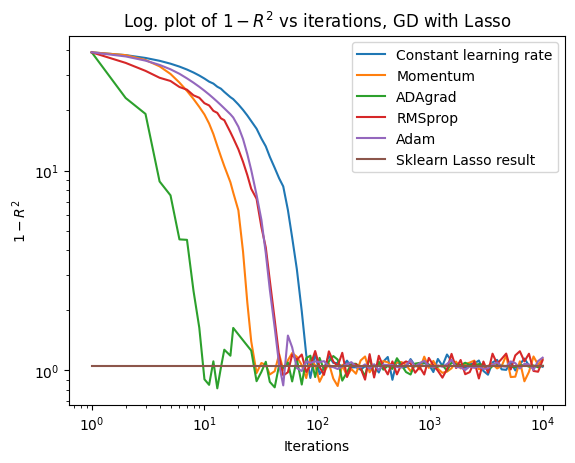

In [ ]:
plt.plot(mse_data_gd_constant_step[0], mse_data_gd_constant_step[1], label='Constant learning rate')
plt.plot(mse_data_gd_momentum[0], mse_data_gd_momentum[1], label='Momentum')
plt.plot(mse_data_gd_ADAgrad[0], mse_data_gd_ADAgrad[1], label='ADAgrad')
plt.plot(mse_data_gd_RMSprop[0], mse_data_gd_RMSprop[1], label='RMSprop')
plt.plot(mse_data_gd_Adam[0], mse_data_gd_Adam[1], label='Adam')

sklearn_mse = gd_constant.sklearn_lasso_mse(10**1)
print("Lasso: ", sklearn_mse)
plt.plot(mse_data_gd_constant_step[0],np.ones(len(mse_data_gd_constant_step[0]))*sklearn_mse,label="Scikit-Learn Lasso result")

plt.title("Log. plot of $1 - R^2$ vs iterations, GD with Lasso")
plt.xlabel("Iterations")
plt.ylabel("$1 - R^2$")
plt.loglog()
plt.legend()

plt.show()

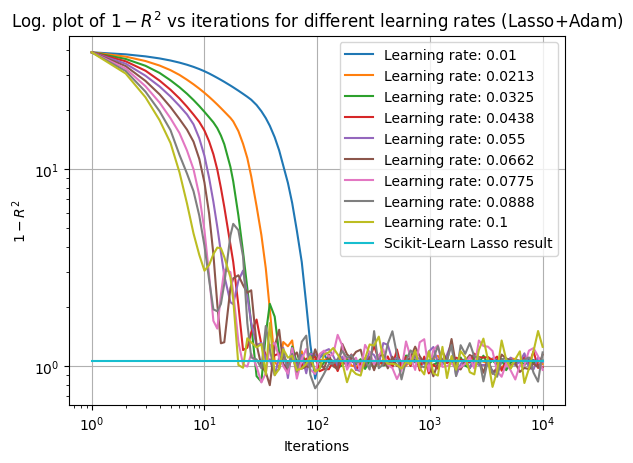

In [6]:
# Performing ordinary gradient descent for Lasso regression

iterations = 10**4

learning_rates = np.linspace(0.01,0.1,9)

for i in range(len(learning_rates)): 
    gd_constant = GradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=AdamStep(learning_rate=learning_rates[i],beta1 = 0.9,beta2 = 0.999))
    mse_data_gd_constant_step = gd_constant.train(iterations=iterations)
    plt.plot(mse_data_gd_constant_step[0], mse_data_gd_constant_step[1], label=f"Learning rate: {round(learning_rates[i],4)}")

sklearn_mse = gd_constant.sklearn_lasso_mse(10**1)
plt.plot(mse_data_gd_constant_step[0],np.ones(len(mse_data_gd_constant_step[0]))*sklearn_mse,label="Scikit-Learn Lasso result")
plt.xlabel("Iterations")
plt.ylabel("$1 - R^2$")
plt.loglog()
plt.grid()
plt.legend(loc="upper right")

plt.title("Log. plot of $1 - R^2$ vs iterations for different learning rates (Lasso+Adam)")
plt.show()

NOTES: 

-Generically, there are large fluctuations in the MSE around the minimum. This is true for all gradient descent methods.

-For constant step gradient descent: interval in learning rate between 0.0002 and 0.001. For learning rates larger than 0.001, there were large fluctuations around the minimum. 

-For momentum gradient descent: interval learning rate between 0.0002 and 0.001. For learning rates larger than 0.001, there are large oscillations in MSE around minimum. 

-For ADagrad: interval in learning rate between 0.05 and 0.3. For Adagrad, there were large oscillations in the MSE for early iterations. However, the iterations damped over time. Thus small oscillations at the end (unlike the other gradient descent methods). 

-For RMSprop: interval in learning rates between 0.01 and 0.06. For learning rates larger than roughly 0.06, the MSE does not converge towards the one with the optimal parameters. Generally, there are large fluctuations in the MSE for larger values of the learning rate. 

-For Adam, the MSE does not converge towards the minimum (oscillates around another value of MSE) for learning rates larger than 0.1. For larger learning rates, there are larger oscillations around the minimum. For learning rates larger than roughly 0.02, the gradient descent converged after roughly the same number of iterations (roughly 60 iterations). 

### Exercise 1f)

Here, we include stochastic gradient descent in our analysis. 

In [7]:
# OLS regression, with stochastic gradient descent. 

n_batches = 8

gd_constant_stochastic = StochasticGradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=0.2))
gd_momentum_stochastic = StochasticGradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=MomentumStep(learning_rate=0.3, momentum=0.7))
gd_ADAgrad_stochastic = StochasticGradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.3))
gd_RMSprop_stochastic = StochasticGradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=RMSpropStep(learning_rate=0.008, decay_rate=0.9))
gd_Adam_stochastic = StochasticGradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=AdamStep(learning_rate=0.1, beta1=0.9, beta2=0.999))


mse_data_gd_constant_step_stochastic = gd_constant_stochastic.train(epochs=iterations,n_batches = n_batches)
mse_data_gd_momentum_stochastic = gd_momentum_stochastic.train(epochs=iterations,n_batches = n_batches)
mse_data_gd_ADAgrad_stochastic = gd_ADAgrad_stochastic.train(epochs=iterations)
mse_data_gd_RMSprop_stochastic = gd_RMSprop_stochastic.train(epochs=iterations)
mse_data_gd_Adam_stochastic = gd_Adam_stochastic.train(epochs=iterations)



OLS:  0.16288433039333017


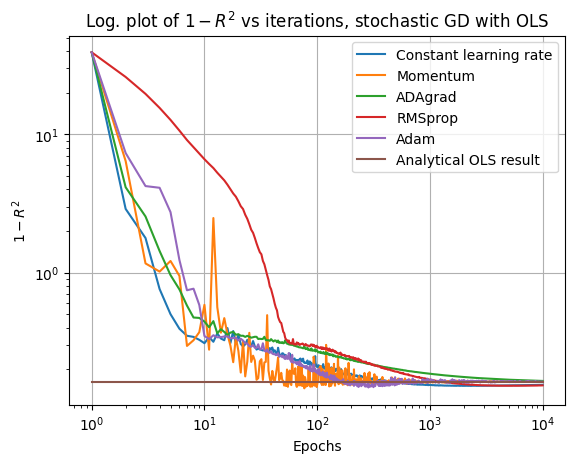

In [8]:
plt.plot(mse_data_gd_constant_step_stochastic[0], mse_data_gd_constant_step_stochastic[1],label='Constant learning rate')
plt.plot(mse_data_gd_momentum_stochastic[0], mse_data_gd_momentum_stochastic[1], label='Momentum')
plt.plot(mse_data_gd_ADAgrad_stochastic[0], mse_data_gd_ADAgrad_stochastic[1],label='ADAgrad')
plt.plot(mse_data_gd_RMSprop_stochastic[0], mse_data_gd_RMSprop_stochastic[1], label='RMSprop')
plt.plot(mse_data_gd_Adam_stochastic[0], mse_data_gd_Adam_stochastic[1],label='Adam')

sklearn_mse = gd_constant_stochastic.analytical_OLS_mse()
print("OLS: ",sklearn_mse)
plt.plot(mse_data_gd_constant_step[0],np.ones(len(mse_data_gd_constant_step[0]))*sklearn_mse,label="Analytical OLS result")

plt.title("Log. plot of $1 - R^2$ vs iterations, stochastic GD with OLS")
plt.xlabel("Epochs")
plt.ylabel("$1 - R^2$")
plt.loglog()
plt.grid()
plt.legend(loc="upper right")

plt.show()

In [9]:
# Ridge regression, with stochastic gradient descent. 

n_batches = 8

gd_constant_stochastic = StochasticGradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=0.04))
gd_momentum_stochastic = StochasticGradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=MomentumStep(learning_rate=0.003, momentum=0.7))
gd_ADAgrad_stochastic = StochasticGradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.4))
gd_RMSprop_stochastic = StochasticGradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=RMSpropStep(learning_rate=0.005, decay_rate=0.9))
gd_Adam_stochastic = StochasticGradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=AdamStep(learning_rate=0.05, beta1=0.9, beta2=0.999))

mse_data_gd_constant_step_stochastic = gd_constant_stochastic.train(epochs=iterations,n_batches = n_batches)
mse_data_gd_momentum_stochastic = gd_momentum_stochastic.train(epochs=iterations)
mse_data_gd_ADAgrad_stochastic = gd_ADAgrad_stochastic.train(epochs=iterations)
mse_data_gd_RMSprop_stochastic = gd_RMSprop_stochastic.train(epochs=iterations)
mse_data_gd_Adam_stochastic = gd_Adam_stochastic.train(epochs=iterations)

Ridge:  0.8308420119630023


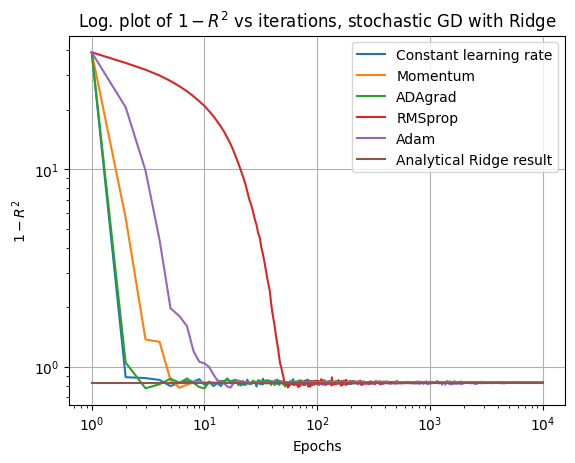

In [10]:
plt.plot(mse_data_gd_constant_step_stochastic[0], mse_data_gd_constant_step_stochastic[1],label='Constant learning rate')
plt.plot(mse_data_gd_momentum_stochastic[0], mse_data_gd_momentum_stochastic[1], label='Momentum')
plt.plot(mse_data_gd_ADAgrad_stochastic[0], mse_data_gd_ADAgrad_stochastic[1],label='ADAgrad')
plt.plot(mse_data_gd_RMSprop_stochastic[0], mse_data_gd_RMSprop_stochastic[1], label='RMSprop')
plt.plot(mse_data_gd_Adam_stochastic[0], mse_data_gd_Adam_stochastic[1],label='Adam')

sklearn_mse = gd_constant_stochastic.analytical_Ridge_mse(10**1)
print("Ridge: ",sklearn_mse)
plt.plot(mse_data_gd_constant_step[0],np.ones(len(mse_data_gd_constant_step[0]))*sklearn_mse,label="Analytical Ridge result")

plt.title("Log. plot of $1 - R^2$ vs iterations, stochastic GD with Ridge")
plt.xlabel("Epochs")
plt.ylabel("$1 - R^2$")
plt.loglog()
plt.grid()
plt.legend(loc="upper right")

plt.show()

In [11]:
# Lasso regression, with stochastic gradient descent. 

n_batches = 8

gd_constant_stochastic = StochasticGradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=0.001))
gd_momentum_stochastic = StochasticGradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=MomentumStep(learning_rate=0.001, momentum=0.7))
gd_ADAgrad_stochastic = StochasticGradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.2))
gd_RMSprop_stochastic = StochasticGradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=RMSpropStep(learning_rate=0.016, decay_rate=0.9))
gd_Adam_stochastic = StochasticGradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=AdamStep(learning_rate=0.02, beta1=0.9, beta2=0.999))

mse_data_gd_constant_step_stochastic = gd_constant_stochastic.train(epochs=iterations,n_batches = n_batches)
mse_data_gd_momentum_stochastic = gd_momentum_stochastic.train(epochs=iterations)
mse_data_gd_ADAgrad_stochastic = gd_ADAgrad_stochastic.train(epochs=iterations)
mse_data_gd_RMSprop_stochastic = gd_RMSprop_stochastic.train(epochs=iterations)
mse_data_gd_Adam_stochastic = gd_Adam_stochastic.train(epochs=iterations)

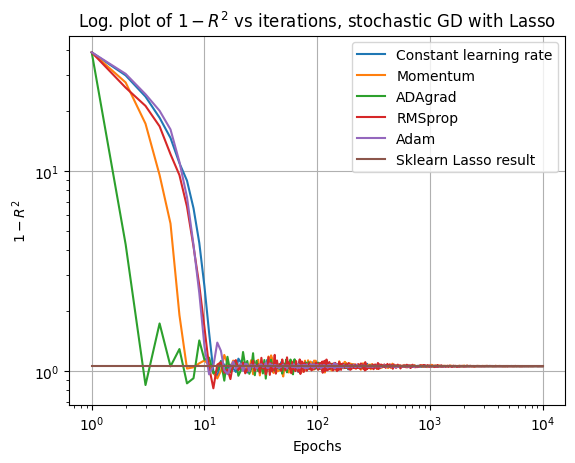

In [12]:
plt.plot(mse_data_gd_constant_step_stochastic[0], mse_data_gd_constant_step_stochastic[1],label='Constant learning rate')
plt.plot(mse_data_gd_momentum_stochastic[0], mse_data_gd_momentum_stochastic[1], label='Momentum')
plt.plot(mse_data_gd_ADAgrad_stochastic[0], mse_data_gd_ADAgrad_stochastic[1],label='ADAgrad')
plt.plot(mse_data_gd_RMSprop_stochastic[0], mse_data_gd_RMSprop_stochastic[1], label='RMSprop')
plt.plot(mse_data_gd_Adam_stochastic[0], mse_data_gd_Adam_stochastic[1],label='Adam')

sklearn_mse = gd_constant.sklearn_lasso_mse(10**1)
plt.plot(mse_data_gd_constant_step[0],np.ones(len(mse_data_gd_constant_step[0]))*sklearn_mse,label="Sklearn Lasso result")

plt.title("Log. plot of $1 - R^2$ vs iterations, stochastic GD with Lasso")
plt.xlabel("Epochs")
plt.ylabel("$1 - R^2$")
plt.loglog()
plt.grid()
plt.legend(loc="upper right")

plt.show()